In [194]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from prettytable import PrettyTable

In [195]:
## original dataframe
print("original dataframe")
filedata = r"C:\Users\umay2\Desktop\SUFFER\UNIV\SEMESTER 2\Metode Sains Data I\PRAKTIKUM\UTP\Data_UTPMSD1.csv"
df = pd.read_csv(filedata)
print(df)

original dataframe
       Produksi  Luas Panen  Curah hujan  Kelembapan  Suhu rata-rata
0    1329536.00   323589.00       1627.0       82.00           26.06
1    1299699.00   329041.00       1521.0       82.12           26.92
2    1382905.00   339253.00       1476.0       82.72           26.27
3    1419128.00   348223.00       1557.0       83.00           26.08
4    1368074.00   337561.00       1339.0       82.46           26.31
..          ...         ...          ...         ...             ...
219  3831923.00   390799.00       2317.6       79.40           26.45
220  4090654.00   396559.00       1825.1       77.04           26.36
221  2488641.91   511940.93       1385.8       76.05           25.50
222  2164089.33   464103.42       1706.4       78.03           27.23
223  2604913.29   545149.05       2211.3       75.80           24.58

[224 rows x 5 columns]


In [196]:
## deskripsi dataframe numerik
print('')
print("deskripsi dataframe numerik:")
maindata = df.describe()
print(maindata)


deskripsi dataframe numerik:
           Produksi     Luas Panen  Curah hujan  Kelembapan  Suhu rata-rata
count  2.240000e+02     224.000000   224.000000  224.000000      224.000000
mean   1.679701e+06  374349.966920  2452.490759   80.948705       26.801964
std    1.161387e+06  232751.161987  1031.972625    4.878680        1.197041
min    4.293800e+04   63142.040000   222.500000   54.200000       22.190000
25%    5.488570e+05  146919.500000  1703.525000   78.975000       26.177500
50%    1.667773e+06  373551.500000  2315.700000   82.375000       26.730000
75%    2.436851e+06  514570.250000  3039.700000   84.000000       27.200000
max    4.881089e+06  872737.000000  5522.000000   90.600000       29.850000


In [197]:
#definisikan variabel prediktor
pcollums = ['Luas Panen', 'Curah hujan','Kelembapan','Suhu rata-rata']
#ubah menjadi float
x = df[pcollums].astype(int)
x.head(4)

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,323589,1627,82,26
1,329041,1521,82,26
2,339253,1476,82,26
3,348223,1557,83,26


In [198]:
#definisikan variabel respon/convert ke int cause idk
rcollums = ['Produksi']
y= df[rcollums].astype(int)
y.head(2)

,Produksi
0,1329536
1,1299699


Text(0.5, 1.0, 'Luas panen dan produksi')

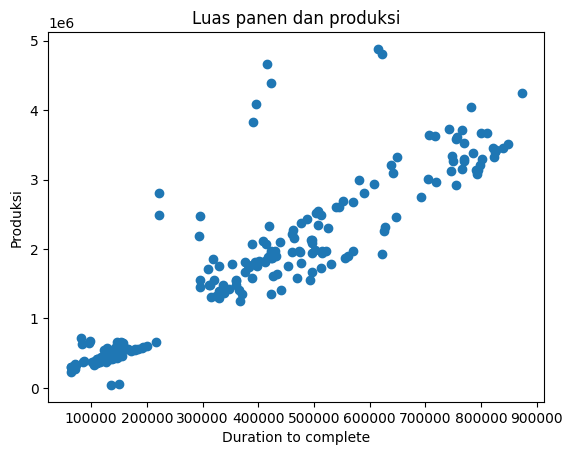

In [199]:
#membuat scatterplot luas panen
plt.scatter(df[['Luas Panen']], df[["Produksi"]])
plt.xlabel('Duration to complete')
plt.ylabel('Produksi')
plt.title("Luas panen dan produksi")

Text(0.5, 1.0, 'Curah hujan dan produksi')

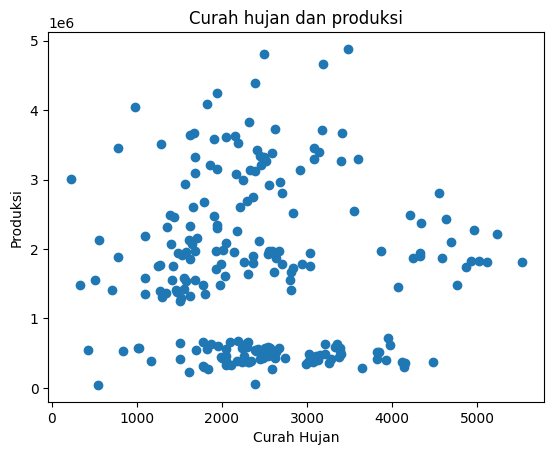

In [200]:
#membuat scatterplot Curah Hujan
plt.scatter(df[['Curah hujan']], df[["Produksi"]])
plt.xlabel('Curah Hujan')
plt.ylabel('Produksi')
plt.title("Curah hujan dan produksi")

Text(0.5, 1.0, 'Kelembapan dan produksi')

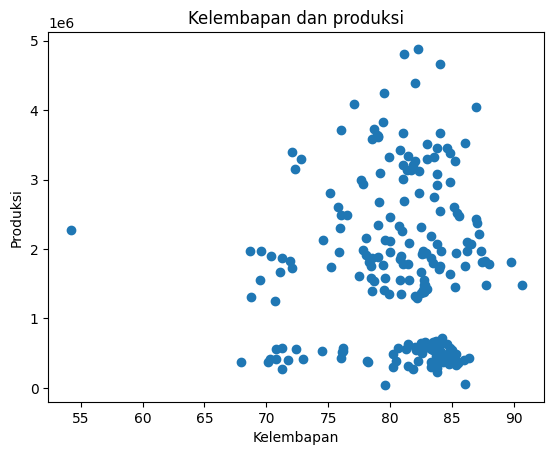

In [201]:
#membuat scatterplot Kelembapan
plt.scatter(df[['Kelembapan']], df[["Produksi"]])
plt.xlabel('Kelembapan')
plt.ylabel('Produksi')
plt.title("Kelembapan dan produksi")

Text(0.5, 1.0, 'Suhu rata-rata dan produksi')

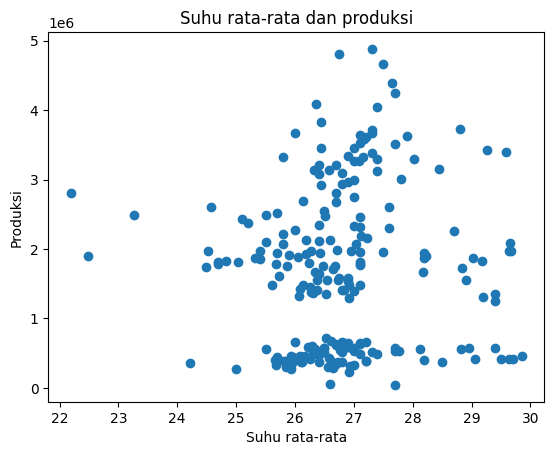

In [202]:
#membuat scatterplot Suhu rata-rata
plt.scatter(df[['Suhu rata-rata']], df[["Produksi"]])
plt.xlabel('Suhu rata-rata')
plt.ylabel('Produksi')
plt.title("Suhu rata-rata dan produksi")

In [203]:
#menyatukan prediktor dalam satu variabel x
x = df.drop(df.columns[[0]], axis=1)
#menaruh respon di variabel y 
y = df.Produksi

In [204]:
#membagi data testing dan training
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

In [205]:
#menginisialisasi regresi linier
lreg = LinearRegression()
#mencocokkan regresi linier pada training dataset
lreg.fit(x_train, y_train)

LinearRegression()

In [206]:
#print koefisien regresi linier setiap predictor dalam bilangan desimal 5 angka di belakang koma
print( 'Model Coefficients')
for col, coef in zip(x.columns, lreg. coef_):
    print(f' {col:>9}: {coef:0.5f}')

Model Coefficients
 Luas Panen: 4.61127
 Curah hujan: 34.44496
 Kelembapan: -6803.73870
 Suhu rata-rata: -65908.44575


In [207]:
#training data
train_detKoef = lreg.score(x_train, y_train)
test_detKoef = lreg.score(x_test, y_test)
print( 'Train R2:', train_detKoef)
print( 'Test R2:', test_detKoef)

Train R2: 0.8014592878090888
Test R2: 0.9354072534064051


In [208]:
#prediksi alogritma
y_pred_train = lreg.predict(x_train)
MSE_train = mean_squared_error(y_train,y_pred_train)
y_pred_test = lreg.predict(x_test)
MSE_test = mean_squared_error (y_test, y_pred_test)
print( 'Train MSE: ', MSE_train)
print( 'Test MSE: ', MSE_test)

Train MSE:  274942372489.66504
Test MSE:  75014464878.46707


In [209]:
#MSE dan R2
mse_list = []
R2_list = []
cols = [['Luas Panen'],['Curah hujan'],['Kelembapan'],['Suhu rata-rata']]
for i in cols:
    x = df[i]
    y = df['Produksi']
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
    lreg = LinearRegression()
    lreg.fit(x_train, y_train)
    y_pred = lreg.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = lreg.score(x_test, y_test)
    mse_list.append(MSE)
    R2_list.append(R2)
    print(mse_list)

[83757979533.50516]
[83757979533.50516, 1260004810164.6257]
[83757979533.50516, 1260004810164.6257, 1173981998365.2158]
[83757979533.50516, 1260004810164.6257, 1173981998365.2158, 1174372868592.6602]


In [210]:
#tabel hasil regresi linier
t = PrettyTable(['Predictors', 'MSE', 'R2'])
for i in range(len(cols)):
    t.add_row([cols[i], mse_list[i], R2_list[i]])
print(t)

+--------------------+--------------------+-----------------------+
|     Predictors     |        MSE         |           R2          |
+--------------------+--------------------+-----------------------+
|   ['Luas Panen']   | 83757979533.50516  |   0.9278784704261458  |
|  ['Curah hujan']   | 1260004810164.6257 |  -0.08495303594489201 |
|   ['Kelembapan']   | 1173981998365.2158 | -0.010881326004283265 |
| ['Suhu rata-rata'] | 1174372868592.6602 | -0.011217892846334232 |
+--------------------+--------------------+-----------------------+


In [211]:
#laporan regresi linier
print("Mean Squared Error (MSE) dalam test set:", MSE_test)
print("R-squared (R2) dalam test set:", test_detKoef)

Mean Squared Error (MSE) dalam test set: 75014464878.46707
R-squared (R2) dalam test set: 0.9354072534064051
